## **What is Fine-Tuning?**
**Fine-tuning** is the process of taking a **pretrained model** (like GPT or a neural network trained on a large dataset) and further training it on a **smaller, specific dataset** to adapt it to a **particular task or domain**. Instead of training a model from scratch—which requires enormous amounts of data and computational resources—fine-tuning starts with a **base model** that has already learned a general understanding of language and continues training it on task-specific data.
<div style="text-align: center;">
    <img src="https://www.mygreatlearning.com/blog/wp-content/uploads/2025/04/fine-tuning-banner.jpg" width="600"/>
</div>

---

### **Why Fine-Tune a Language Model?**

Pre-trained language models, like GPT, BERT, or T5, are trained on massive corpora containing general-purpose text (like books, Wikipedia, or web pages). These models understand the structure of language, grammar, and basic reasoning. However, they:

* Don’t know your domain-specific terminology or context (e.g., event ticketing).
* Don’t handle company-specific questions or style (e.g., refund policies, support tone).
* May produce vague or inaccurate answers for niche queries.

**Fine-tuning bridges this gap.** It helps the model specialize in your data, leading to:

* More accurate and relevant responses
* Faster and more personalized answers
* Reduced hallucinations or off-topic replies

---

### **How Fine-Tuning Works**

#### 1. **Start with a Pre-trained Model**

You choose a large language model like GPT-3, BERT, or LLaMA that has already been trained on general language.

#### 2. **Prepare Your Dataset**

This dataset should be relevant to your target application. In your case, it likely includes:

* Chat logs from customer support
* FAQs about ticketing and events
* User queries and expected answers
* Policies, error messages, cancellation steps, etc.

The format usually consists of **input-output pairs**, like:

```
User: "Can I get a refund if the event is canceled?"
Bot: "Yes, if the event is canceled, you will receive a full refund automatically within 5-7 business days."
```

#### 3. **Fine-Tune the Model**

This is done by continuing the training process on your dataset. The model adjusts its internal parameters (weights) to reduce errors on the new, domain-specific data.

* You use **smaller learning rates** so the model doesn’t “forget” what it already knows.
* The process might involve a few thousand to a few million examples, depending on the scale.

#### 4. **Evaluate and Validate**

You test the model on new data (not seen during training) to ensure it generalizes well. Metrics may include:

* Accuracy
* Relevance
* Response time
* User satisfaction

---

### **Types of Fine-Tuning**

There are different levels of fine-tuning depending on resources and needs:

* **Full fine-tuning**: All model parameters are updated. This gives the best results but is expensive.
* **Adapter-based fine-tuning / LoRA / QLoRA**: Only a small subset of model parameters are updated. It's efficient and popular in production.
* **Instruction tuning / Supervised fine-tuning (SFT)**: Model learns from examples of instructions and desired responses.
* **RLHF (Reinforcement Learning from Human Feedback)**: Used for refining the model’s responses using human preferences, often after fine-tuning.

##      

# **Installing and Importing Required Libraries**

In [ ]:
!pip install wandb
!pip install datasets
!pip install spacy
!python -m spacy download en_core_web_trf

In [ ]:
!pip install trl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 375.8/375.8 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 43.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 41.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from datasets import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
from transformers import (
    AutoModelForCausalLM,
    AutoTokenizer,
    TrainingArguments,
    pipeline
)
from peft import LoraConfig, prepare_model_for_kbit_training, get_peft_model
from trl import SFTTrainer


import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv("hf://datasets/bitext/Bitext-events-ticketing-llm-chatbot-training-dataset/bitext-events-ticketing-llm-chatbot-training-dataset .csv")
data

,instruction,intent,category,tags,response
0,I'd like to cancel my ticket for the game in t...,cancel_ticket,CANCELLATIONS,BCILPQZ,To cancel your ticket for the {{EVENT}} in {{C...
1,I have to cancel my fucking ticket for the eve...,cancel_ticket,CANCELLATIONS,BCILW,To proceed with the cancellation of your ticke...
2,I'd like to cancel my ticket for the game in t...,cancel_ticket,CANCELLATIONS,BCILPQZ,To cancel your ticket for the {{EVENT}} in {{C...
3,I have to cancel my fucking ticket for the eve...,cancel_ticket,CANCELLATIONS,BCILW,To cancel your ticket for the {{EVENT}} in {{C...
4,i have to cancel my fucking ticket for the sho...,cancel_ticket,CANCELLATIONS,BCLQW,To cancel your ticket for the {{EVENT}} in {{C...
...,...,...,...,...,...
24697,I would like to upgrade my fucking tickets for...,upgrade_ticket,TICKETS,BCIMPWZ,"To upgrade your ticket for the upcoming event,..."
24698,I'd like to upgrade my fucking ticket for the ...,upgrade_ticket,TICKETS,BCIPW,"To upgrade your ticket for the upcoming event,..."
24699,need to upgrade my ticket for the event how d...,upgrade_ticket,TICKETS,BCIQZ,"To upgrade your ticket for the upcoming event,..."
24700,i gotto upgrade my fucking ticket for the even...,upgrade_ticket,TICKETS,BCIQWZ,"To upgrade your ticket for the upcoming event,..."


In [ ]:
df = data.copy()

# **Exploratory Data Analysis (EDA)**

In [ ]:
# Print the shape of the DataFrame
print("Shape of the DataFrame:")
print(df.shape)

Shape of the DataFrame:
(24702, 5)


In [ ]:
# Basic Information about the DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   instruction  24702 non-null  object
 1   intent       24702 non-null  object
 2   category     24702 non-null  object
 3   tags         24702 non-null  object
 4   response     24702 non-null  object
dtypes: object(5)
memory usage: 965.1+ KB
None


In [ ]:
# Check for missing values
print("\nMissing values:")
print(df.isnull().sum())


Missing values:
instruction    0
intent         0
category       0
tags           0
response       0
dtype: int64


In [ ]:
# Check for duplicate rows
print("Duplicate rows:")
print(df.duplicated().sum())

Duplicate rows:
2


In [ ]:
df.drop_duplicates(inplace=True, ignore_index=True)
df

,instruction,intent,category,tags,response
0,I'd like to cancel my ticket for the game in t...,cancel_ticket,CANCELLATIONS,BCILPQZ,To cancel your ticket for the {{EVENT}} in {{C...
1,I have to cancel my fucking ticket for the eve...,cancel_ticket,CANCELLATIONS,BCILW,To proceed with the cancellation of your ticke...
2,I have to cancel my fucking ticket for the eve...,cancel_ticket,CANCELLATIONS,BCILW,To cancel your ticket for the {{EVENT}} in {{C...
3,i have to cancel my fucking ticket for the sho...,cancel_ticket,CANCELLATIONS,BCLQW,To cancel your ticket for the {{EVENT}} in {{C...
4,how could i cancel my fucking tickets for the...,cancel_ticket,CANCELLATIONS,BILMPQWZ,To cancel your ticket for the {{EVENT}} in {{C...
...,...,...,...,...,...
24695,I would like to upgrade my fucking tickets for...,upgrade_ticket,TICKETS,BCIMPWZ,"To upgrade your ticket for the upcoming event,..."
24696,I'd like to upgrade my fucking ticket for the ...,upgrade_ticket,TICKETS,BCIPW,"To upgrade your ticket for the upcoming event,..."
24697,need to upgrade my ticket for the event how d...,upgrade_ticket,TICKETS,BCIQZ,"To upgrade your ticket for the upcoming event,..."
24698,i gotto upgrade my fucking ticket for the even...,upgrade_ticket,TICKETS,BCIQWZ,"To upgrade your ticket for the upcoming event,..."


# **Data Visualization**

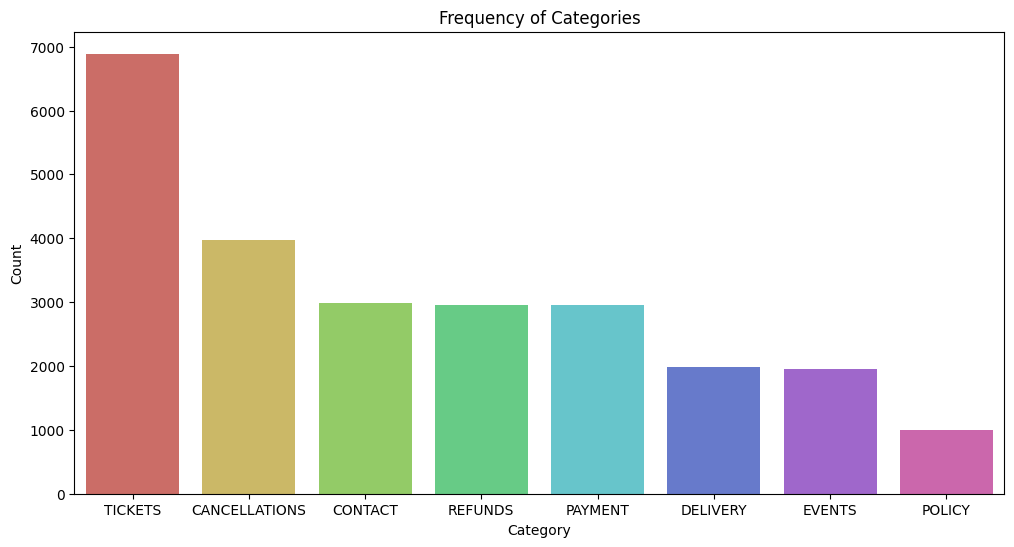

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=df['category'].value_counts().index,
            y=df['category'].value_counts().values,
            palette='hls')
plt.title('Frequency of Categories')
plt.xlabel('Category')
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.show()

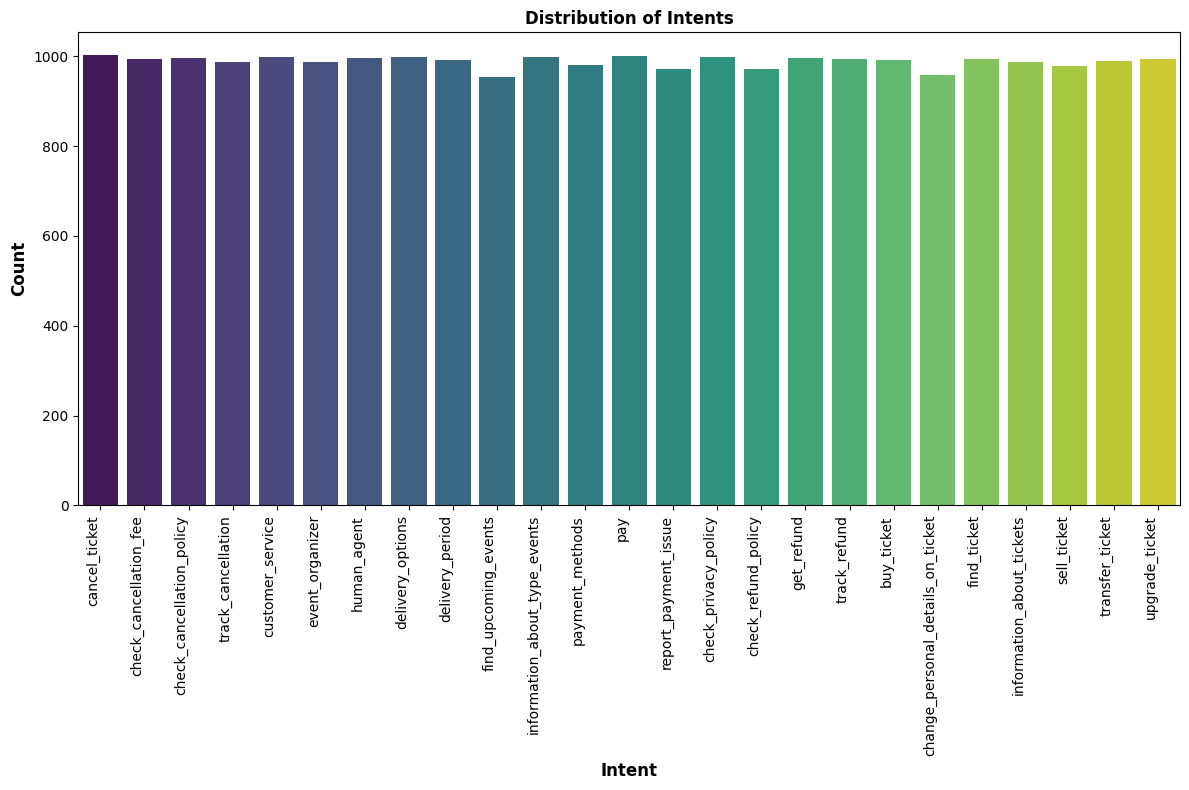

In [ ]:
# Distribution of 'intent'
plt.figure(figsize=(12, 8))
sns.countplot(data=df, x='intent', palette='viridis')
plt.title('Distribution of Intents', fontsize=12, fontweight='bold')
plt.xlabel('Intent', fontsize=12, fontweight='bold')
plt.ylabel('Count', fontsize=12, fontweight='bold')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

### **Observation** :
- The intent distribution in the dataset is relatively balanced, with most intents having counts near 1000. While a few intents like **change_personal_details_on_ticket** and **find_upcoming_events** have slightly lower frequencies, there are no significant imbalances. This suggests that the data is well-distributed for training, but it’s still important to optimize the chatbot to handle both high- and low-frequency intents effectively to ensure comprehensive coverage.

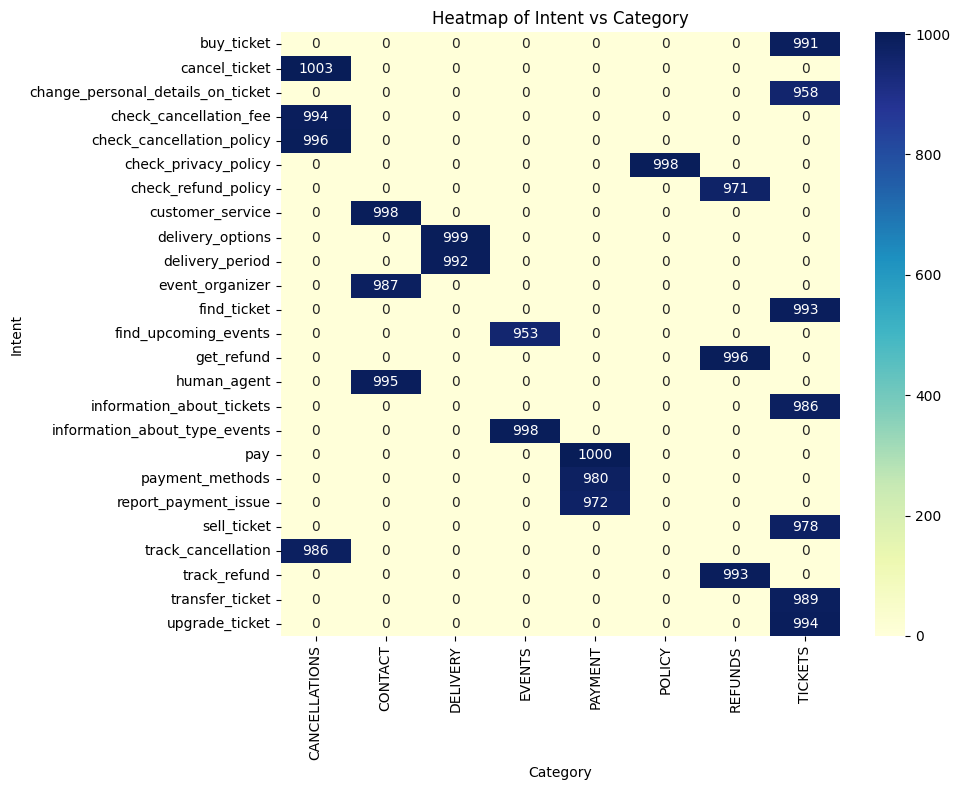

In [ ]:
# Heatmap of Intent vs Category
intent_category_crosstab = pd.crosstab(df['intent'], df['category'])

plt.figure(figsize=(10, 8))
sns.heatmap(intent_category_crosstab, annot=True, cmap="YlGnBu", fmt='d')
plt.title('Heatmap of Intent vs Category')
plt.ylabel('Intent')
plt.xlabel('Category')
plt.tight_layout()
plt.show()

##   

# **Data Cleaning**

### **1. Removing Abusive Words**

In [ ]:
pd.set_option("display.max_colwidth", None)

filtered_df = df[df['instruction'].str.contains("fucking ", case=False, na=False)]
filtered_df['instruction'].head(10)

,instruction
1,"I have to cancel my fucking ticket for the event in this town, where to do it?"
2,"I have to cancel my fucking ticket for the event in this town, where to do it?"
3,i have to cancel my fucking ticket for the show i need help
4,how could i cancel my fucking tickets for the show in this city
7,wanna cancel my fucking ticket for the concert will ya help me
8,wana cancel my fucking tickets
10,id like to cancel my fucking tickets for the game in this city could i get some help
12,"I have to cancel my fucking ticket for the event in this town, where to do it?"
13,i have to cancel my fucking ticket for the show i need help
14,how could i cancel my fucking tickets for the show in this city


In [ ]:
# Remove the word "f#cking " from the 'instruction' column
df['instruction'] = df['instruction'].str.replace("fucking ", '', regex=False)
df['instruction'].head(10)

,instruction
0,I'd like to cancel my ticket for the game in this city how canm i do it
1,"I have to cancel my ticket for the event in this town, where to do it?"
2,"I have to cancel my ticket for the event in this town, where to do it?"
3,i have to cancel my ticket for the show i need help
4,how could i cancel my tickets for the show in this city
5,wanna cancel my ticket for the show in this town how to do it
6,could i cancel my ticket for the show in this city
7,wanna cancel my ticket for the concert will ya help me
8,wana cancel my tickets
9,would it be possible to cancel my ticket?


In [ ]:
filtered_df = df[df['instruction'].str.contains("fucking", case=False, na=False)]
filtered_df['instruction'].head(10)

,instruction
1040,i have to see the fuckingcancellation fee could i get some help
1183,"I can't find the fuckingcancellation penalties, can you help me see them?"
1671,how can I get information about the fuckingcancellation penalty?
1756,i cant find the fuckingcancellation fee
2006,i need information about ur fuckingf cancellation policy where can i find it
2185,tell me more about your fuckingv cancellation policy
2206,how can i check ur fuckingcancellation policy
2299,wanna check ur fuckingcancellation policy i need assistance
2573,I'd like to see ur fuckingcancellation policy how can i do it
3138,how do i check the fuckingstatus of my cancellation


In [ ]:
# Remove the word "f#cking " from the 'instruction' column
df['instruction'] = df['instruction'].str.replace("fucking", '', regex=False)
df['instruction'].head(10)

,instruction
0,I'd like to cancel my ticket for the game in this city how canm i do it
1,"I have to cancel my ticket for the event in this town, where to do it?"
2,"I have to cancel my ticket for the event in this town, where to do it?"
3,i have to cancel my ticket for the show i need help
4,how could i cancel my tickets for the show in this city
5,wanna cancel my ticket for the show in this town how to do it
6,could i cancel my ticket for the show in this city
7,wanna cancel my ticket for the concert will ya help me
8,wana cancel my tickets
9,would it be possible to cancel my ticket?


In [ ]:
# Capitalizing the first letter of the first word and keeping the rest of the string unchanged
df['instruction'] = df['instruction'].apply(lambda x: x[0].upper() + x[1:] if len(x) > 0 else x)

In [ ]:
df = df[['instruction', 'intent', 'response']]
df.head(5)

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{TICKET_EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
4,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


## **2. Place Holder Replacement**

In [ ]:
# Find rows containing the {{TICKET_EVENT}} placeholder
ticket_event_rows = df[df['response'].str.contains('{{TICKET_EVENT}}', na=False)]
ticket_event_rows.head()

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{TICKET_EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{TICKET_EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
4,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{TICKET_EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


In [ ]:
# Replace {{TICKET_EVENT}} with {{EVENT}}
df['response'] = df['response'].str.replace('{{TICKET_EVENT}}', '{{EVENT}}')
df.head()

,instruction,intent,response
0,I'd like to cancel my ticket for the game in this city how canm i do it,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Access {{WEBSITE_URL}} and sign in to your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} section.\n3. Locate your upcoming events and click on the {{EVENT}} in {{CITY}}.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Complete the prompts to finalize your cancellation.\n\nIf any issues arise, do not hesitate to reach out to our customer support for further help."
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
2,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions:\n\n1. Go to {{WEBSITE_URL}} and enter your credentials to log in.\n2. Access the {{CANCEL_TICKET_SECTION}} area.\n3. Locate the event you wish to cancel under your upcoming events and choose the {{EVENT}} in {{CITY}}.\n4. Press the {{CANCEL_TICKET_OPTION}} button.\n5. Complete the cancellation process by following the on-screen prompts.\n\nIf you face any difficulties, please reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
4,How could i cancel my tickets for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Sign in to your account on {{WEBSITE_URL}}.\n2. Go to the {{CANCEL_TICKET_SECTION}} area.\n3. Locate your list of upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Click on the {{CANCEL_TICKET_OPTION}} button.\n5. Proceed with the instructions to confirm your ticket cancellation.\n\nIf any difficulties arise, please reach out to our customer service team for further help."


## **3. Adjusting Response Phrasing**

In [ ]:
# Function to check if the last line after \n\n contains "Should you"
def contains_should_you(response):
    # Split the response by \n\n and take the last line
    last_line = response.split('\n\n')[-1]
    return "Should you" in last_line

# Filter rows based on the last line of the response
filtered_df = df[df['response'].apply(contains_should_you)]
filtered_df.head()

,instruction,intent,response
1,"I have to cancel my ticket for the event in this town, where to do it?",cancel_ticket,"To proceed with the cancellation of your ticket for {{EVENT}} in {{CITY}}, please adhere to the following procedure: \n\n1. Access {{WEBSITE_URL}} and sign in to your account. \n2. Proceed to the {{CANCEL_TICKET_SECTION}} section. \n3. Locate your upcoming events and choose the {{EVENT}} in {{CITY}}. \n4. Press the {{CANCEL_TICKET_OPTION}} button. \n5. Follow the step-by-step instructions to finalize your cancellation.\n\nShould you experience any difficulties, feel free to reach out to our customer support team for additional help."
3,I have to cancel my ticket for the show i need help,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these instructions carefully:\n\n1. Go to {{WEBSITE_URL}} and access your account by logging in.\n2. Proceed to the {{CANCEL_TICKET_SECTION}} section of the website.\n3. Locate your upcoming events and choose the {{EVENT}} happening in {{CITY}}.\n4. Opt for the {{CANCEL_TICKET_OPTION}} feature available there.\n5. Adhere to the on-screen instructions to finalize your cancellation.\n\nShould you require further support, our customer service team is available to assist you."
6,Could i cancel my ticket for the show in this city,cancel_ticket,"To cancel your ticket for the {{EVENT}} in {{CITY}}, please follow these steps:\n\n1. Go to {{WEBSITE_URL}} and access your account.\n2. Go to the {{CANCEL_TICKET_SECTION}} tab.\n3. Locate and select the {{EVENT}} in {{CITY}} under your upcoming events.\n4. Select the {{CANCEL_TICKET_OPTION}} option.\n5. Follow the instructions provided to complete your cancellation.\n\nShould you have any difficulties, please reach out to our customer support for help."
7,Wanna cancel my ticket for the concert will ya help me,cancel_ticket,"To proceed with canceling your ticket for the {{EVENT}} in {{CITY}}, kindly adhere to the following instructions:\n\n1. Access {{WEBSITE_URL}} and proceed to log in to your user account.\n2. Navigate to the section labeled {{CANCEL_TICKET_SECTION}}.\n3. Locate your list of upcoming events and choose the {{EVENT}} in the {{CITY}} from the list.\n4. Select the {{CANCEL_TICKET_OPTION}} link.\n5. Follow the on-screen instructions to finalize your ticket cancellation.\n\nShould you experience any difficulties, do not hesitate to reach out to our customer support team for additional guidance."
8,Wana cancel my tickets,cancel_ticket,"To proceed with cancelling your ticket for the {{EVENT}} occurring in {{CITY}}, kindly adhere to the following instructions: \n\n 1. Access {{WEBSITE_URL}} and sign in using your credentials. \n 2. Go to the {{CANCEL_TICKET_SECTION}} tab. \n 3. Locate the section for your upcoming events and identify the {{EVENT}} scheduled in {{CITY}}. \n 4. Select the option labeled {{CANCEL_TICKET_OPTION}}. \n 5. Complete the required prompts to confirm your cancellation. \n\n Should you face any difficulties, please reach out to our customer support team for further help."


In [ ]:
# Function to replace "Should you" with "If you" in the last line
def replace_should_you_with_if_you(response):
    # Split the response by \n\n and take the last line
    lines = response.split('\n\n')
    last_line = lines[-1]

    # Replace "Should you" with "If you" in the last line
    if "Should you" in last_line:
        lines[-1] = last_line.replace("Should you", "If you")

    # Reassemble the response
    return '\n\n'.join(lines)

# Apply the function to replace "Should you" with "If you"
df['response'] = df['response'].apply(replace_should_you_with_if_you)
df['response'].tail()

,response
24695,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in with your username and password.\n3. Find the {{TICKET_SECTION}} area.\n4. Locate your current ticket under {{UPGRADE_TICKET_INFORMATION}} and click the {{UPGRADE_TICKET_OPTION}} button.\n5. Follow the instructions on the screen to select your desired upgrade and confirm your choices.\n\nIf you run into any trouble during these steps, please reach out to our support team for help."
24696,"To upgrade your ticket for the upcoming event, please follow these procedures:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in using your account credentials.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your current ticket under {{UPGRADE_TICKET_INFORMATION}} and choose the {{UPGRADE_TICKET_OPTION}} feature.\n5. Adhere to the on-screen instructions to select your desired upgrade and confirm your modifications.\n\nIf you face any difficulties during this process, do not hesitate to reach out to our customer support team for further assistance."
24697,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Sign in to your account using your login details.\n3. Head over to the {{TICKET_SECTION}} section.\n4. Find your current ticket under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} option.\n5. Proceed with the on-screen instructions to select your desired upgrade and confirm your selection.\n\nIf you face any difficulties during this process, do not hesitate to reach out to our customer support team for help."
24698,"To upgrade your ticket for the upcoming event, please go through the following procedure:\n\n1. Access the {{WEBSITE_URL}}.\n2. Sign in with your credentials.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your existing ticket purchase under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} button.\n5. Adhere to the on-screen instructions to select your desired upgrade option and confirm your selections.\n\nIf any complications arise during this process, do not hesitate to reach out to our support team for further help."
24699,"To upgrade your ticket for the upcoming event, please follow these steps:\n\n1. Go to the {{WEBSITE_URL}}.\n2. Access your account by entering your login details.\n3. Proceed to the {{TICKET_SECTION}} section.\n4. Find your purchased ticket listed under {{UPGRADE_TICKET_INFORMATION}} and click on the {{UPGRADE_TICKET_OPTION}} option.\n5. Adhere to the on-screen prompts to select your upgrade preferences and finalize the modifications.\n\nIf you face any difficulties during this procedure, do not hesitate to reach out to our support team for further help."


####  

# **🛠️ Fine-tuning Qwen2.5-1.5B-Instruct Model**

## **Qwen2.5-1.5B-Instruct Model: A Detailed Explanation**

The **Qwen2.5-1.5B-Instruct** is a powerful and efficient large language model (LLM) developed by the **Alibaba Cloud Qwen team**. It is part of the broader Qwen2.5 series, which includes models ranging from 0.5 billion to 72 billion parameters. The "1.5B" in its name refers to its **1.54 billion parameters**, making it a relatively compact yet highly capable model. The "**Instruct**" suffix indicates that this model has been specifically fine-tuned to excel at **understanding and following human instructions**, enabling it to effectively execute explicit commands and prompts across a wide array of practical applications.<br><br>

Here's a detailed breakdown of the Qwen2.5-1.5B-Instruct model:

### **1. Model Overview and Architecture:**

* **Foundation:** Qwen2.5-1.5B-Instruct is built upon the Transformer architecture, a cornerstone of modern LLMs, known for its efficiency in processing sequential data.
* **Key Architectural Components:** It incorporates advanced techniques like:
    * **RoPE (Rotary Position Embeddings):** Improves the model's ability to handle longer sequences by encoding positional information efficiently.
    * **SwiGLU (Swish Gated Linear Unit):** An activation function that often leads to better performance compared to traditional GELU or ReLU.
    * **RMSNorm (Root Mean Square Normalization):** A normalization technique that can stabilize training and improve performance.
    * **Attention QKV bias and tied word embeddings:** These are optimizations that contribute to the model's efficiency and performance.
* **Parameters:** It has 1.54 billion parameters (with 1.31 billion non-embedding parameters), striking a balance between size and capability.
* **Layers and Attention Heads:** The model features 28 layers and uses Grouped Query Attention (GQA) with 12 heads for queries and 2 for key-values. GQA helps optimize inference speed while maintaining quality.
* **Tokenizer:** It uses an improved tokenizer specifically designed to be adaptive to multiple natural languages and code.<br><br>

### **2. Key Capabilities and Improvements (compared to Qwen2):**

* **Enhanced Knowledge:** Qwen2.5 models, including the 1.5B-Instruct, possess significantly more knowledge than their predecessors (Qwen2). This is attributed to specialized expert models in domains like coding and mathematics, and training on larger-scale datasets (up to 18 trillion tokens for the Qwen2.5 series).
* **Superior Instruction Following:** It demonstrates significant advancements in understanding and adhering to user instructions, making it highly effective for task-oriented applications.
* **Long-Context Support:** A notable feature is its ability to handle long contexts, supporting up to **128,000** tokens for input and capable of generating up to **8,192** tokens in output. This is crucial for processing and generating lengthy documents, reports, or complex conversations.
* **Improved Coding and Mathematics:** Thanks to dedicated expert models and specialized training data, Qwen2.5-1.5B-Instruct shows greatly enhanced capabilities in coding (e.g., code generation, reasoning, fixing) and mathematical problem-solving.
* **Structured Data Understanding and Generation:** It excels at understanding structured data (like tables) and generating structured outputs, particularly in JSON format. This makes it valuable for data processing, transformation, and manipulation tasks.
* **Multilingual Support:** The model supports over 29 languages, including major global languages like **Chinese, English, French, Spanish, Portuguese, German, Italian, Russian, Japanese, Korean, Vietnamese, Thai, Arabic, and more**. This broad language coverage makes it a versatile tool for various international applications.
* **Resilience to System Prompts:** It is more robust and consistent in its responses even with diverse system prompts, improving its performance in role-play and condition-setting for chatbots.<br><br>

### **3. Training and Optimization:**

* **Pre-training:** The models are pretrained on massive datasets.
* **Post-training (Instruction Tuning):** They undergo post-training using both supervised fine-tuning (SFT) and direct preference optimization (DPO) to align with human preferences and improve instruction following.
* **Quantization Options:** It supports various quantization options (e.g., q2\_K through q8\_0) in formats like GGUF, enabling flexible and efficient deployment even in resource-constrained environments.<br><br>

### **4. Applications and Use Cases:**

The **Qwen2.5-1.5B-Instruct** model is well-suited for a wide range of natural language processing (NLP) tasks and applications, including:

* **Conversational AI and Chatbots:** Its improved instruction-following and resilience to diverse prompts make it excellent for building intelligent conversational agents and chatbots.
* **Content Generation:** Capable of generating long-form text and structured outputs, it can be used for tasks like article writing, report generation, creative writing, and data summarization.
* **Code Generation and Assistance:** Its enhanced coding and mathematics capabilities make it valuable for assisting with software development, including generating code snippets, explaining programming concepts, debugging, and providing solutions to coding problems.
* **Data Processing and Manipulation:** Its ability to understand and generate structured data (especially JSON) opens up opportunities for data extraction, cleaning, and restructuring.
* **Multilingual Applications:** With support for over 29 languages, it can power applications requiring cross-lingual understanding and generation.
* **Educational Tools:** Its mathematical reasoning and explanation capabilities make it useful for tutoring systems and problem-solving.<br><br>

### **5. Limitations:**

While powerful, Qwen2.5-1.5B-Instruct, like all LLMs, has limitations:

* **Knowledge Cut-off:** Its knowledge is limited by its training data and may not have the most up-to-date information or be aware of very recent events.
* **Complex Nuance:** Despite long context support, it might still struggle with fully understanding highly complex, nuanced, or deeply technical topics.
* **Multilingual Proficiency Variation:** While supporting many languages, its proficiency might vary across them, potentially being more accurate in certain languages than others.
* **Role-Play Imperfections:** Although improved, its role-play and condition-setting capabilities may not always be perfect in fully understanding context and responding accordingly.

In [ ]:
# Load the model
model_name = "Qwen/Qwen2.5-1.5B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype=torch.float16  # Optional: Use float16 for faster training
)

config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

In [ ]:
# Load the tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name, use_fast=True)

tokenizer_config.json: 0.00B [00:00, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

In [ ]:
# Format chat messages
def format_chat(row):
    return f"<|im_start|>user\n{row['instruction']}<|im_end|>\n<|im_start|>assistant\n{row['response']}<|im_end|>"

df["text"] = df.apply(format_chat, axis=1)

In [ ]:
# Convert DataFrame to Hugging Face Dataset
dataset = Dataset.from_pandas(df[["text"]]) # Keep only the 'text' column

In [ ]:
# Tokenize your dataset manually
def tokenize_function(example):
    return tokenizer(
        example["text"],
        padding="max_length",
        truncation=True,
        max_length=256,
    )

tokenized_dataset = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/24700 [00:00<?, ? examples/s]

In [ ]:
# Prepare labels for causal LM (labels = input_ids)
def set_labels(example):
    example["labels"] = example["input_ids"]
    return example

tokenized_dataset = tokenized_dataset.map(set_labels, batched=True)

Map:   0%|          | 0/24700 [00:00<?, ? examples/s]

In [ ]:
# Remove unnecessary columns (keep only input_ids and attention_mask)
tokenized_dataset = tokenized_dataset.remove_columns(
    [col for col in tokenized_dataset.column_names if col not in ["input_ids", "attention_mask"]]
)

## **What is PEFT?**

**PEFT (Parameter-Efficient Fine-Tuning)** is a *broad category* of techniques designed to adapt large pre-trained models to new tasks by updating only a small subset of parameters. Instead of fine-tuning every parameter in a massive model, PEFT methods modify or add lightweight components, which reduces computational cost, memory usage, and training time.

* **Examples of PEFT methods:**

  * **LoRA** (Low-Rank Adaptation)
  * **Adapters** (small bottleneck modules inserted into the model)
  * **Prefix Tuning** (learned continuous prompts added to inputs)
  * **BitFit** (fine-tuning only bias terms)<br><br>


## **What is LoRA?**
**LoRA (Low-Rank Adaptation)** is a **parameter-efficient fine-tuning (PEFT)** technique designed for adapting **large pre-trained models** (e.g., Qwen, LLaMA, Mistral, Gemma, etc.) to a specific task. Instead of updating all the model’s original weights, LoRA freezes these weights and introduces a small set of **learnable low-rank matrices** that are added to the model’s existing weights. This approach significantly reduces the number of trainable parameters required during fine-tuning while maintaining or improving performance.


<div style="text-align: center;">
    <img src="https://substackcdn.com/image/fetch/$s_!6A63!,w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2Febf6d60c-7495-4039-a617-6447c1a06d8e_1640x798.gif" width="600"/>
</div>

---

### **Why use LoRA?**

Fine-tuning massive models with billions of parameters can be very expensive in terms of computation, memory, and time. LoRA helps by:

* **Reducing the number of trainable parameters**
* **Lowering computational costs**
* **Maintaining model performance with less data and training**

---

### **How does LoRA work mathematically?**

Consider a weight matrix $W \in \mathbb{R}^{d \times k}$ in a neural network layer (e.g., a fully connected layer or projection matrix in attention).

* Traditional fine-tuning updates $W$ directly:

$$
W \leftarrow W + \Delta W
$$

where $\Delta W$ is the learned update matrix.

* In LoRA, instead of learning a full $\Delta W$, it **constrains $\Delta W$ to be low-rank** by decomposing it into two smaller matrices:

$$
\Delta W = A B
$$

<div style="text-align: center;">
    <img src="https://www.dailydoseofds.com/content/images/size/w1000/2024/02/image-283.png" width="600"/>
</div>

where:

* $A \in \mathbb{R}^{d \times r}$ (tall, skinny matrix)
* $B \in \mathbb{R}^{r \times k}$ (short, wide matrix)
* $r \ll \min(d, k)$ is the **rank**, a small hyperparameter controlling the number of trainable parameters.

**Result:**

* Instead of learning $d \times k$ parameters for $\Delta W$, LoRA learns only $r(d + k)$ parameters.
* Usually $r$ is chosen very small (e.g., 4, 8, 16), making the parameter count drastically smaller.

---

### **Integration into the forward pass**

At inference or fine-tuning time, the modified weight matrix is:

$$
W' = W + \alpha \cdot A B
$$

where:

* $W$ is the original frozen weight.
* $\alpha$ is a scaling factor to control the update magnitude.
* $A$ and $B$ are learned during fine-tuning.

This modified weight $W'$ is used in place of $W$ in the forward pass.

---

### **Benefits of LoRA Fine-tuning:**

* **Parameter efficient:** Fine-tunes only small low-rank matrices, not the full model.
* **Faster training:** Less computation, quicker convergence.
* **Keeps base model frozen:** Original weights stay unchanged.
* **Modular:** Easy to switch or combine adapters for different tasks.
* **Smaller files:** Saves storage and bandwidth.
* **Great for large models:** Enables fine-tuning huge models affordably.

---

### **Use cases of LoRA:**

* Customizing large language models for specific tasks
* Domain adaptation (e.g., medical, legal, finance)
* Multilingual fine-tuning without retraining entire model
* Personalizing AI assistants and chatbots
* Fine-tuning vision models with limited data
* Rapid prototyping on resource-limited hardware


In [ ]:
# LoRA config for efficient fine-tuning
peft_config = LoraConfig(
    r=16,                         # LoRA rank (low-rank dimension)
    lora_alpha=32,                # Scaling factor for LoRA weights
    lora_dropout=0.01,            # Dropout for regularization
    bias="none",                  # Don't update bias terms
    task_type="CAUSAL_LM",        # For causal language modeling
    target_modules=[              # Apply LoRA to these layers
        "q_proj", "k_proj", "v_proj", "output_proj",   # Attention layers
        "gate_proj", "up_proj", "down_proj"            # Feed-forward layers
    ]
)

In [ ]:
# Define the Training arguments
training_arguments = TrainingArguments(
    output_dir='./qwen-support',
    per_device_train_batch_size=4,
    gradient_accumulation_steps=4,
    optim="adamw_torch",
    learning_rate=2e-5,
    num_train_epochs=1,
    fp16=True,
    logging_steps=10,
    save_steps=500,
    lr_scheduler_type="linear"
)

In [ ]:
# Initialize SFTTrainer (without tokenizer or sft_config arguments)
trainer = SFTTrainer(
    model=model,
    args=training_arguments,
    train_dataset=tokenized_dataset,
    peft_config=peft_config
)

Truncating train dataset:   0%|          | 0/24700 [00:00<?, ? examples/s]

No label_names provided for model class `PeftModelForCausalLM`. Since `PeftModel` hides base models input arguments, if label_names is not given, label_names can't be set automatically within `Trainer`. Note that empty label_names list will be used instead.


In [ ]:
import wandb

# Enter your token here
wandb.login(key="Your_WandB_token")

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


True

In [ ]:
# Start training
trainer.train()

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.


Step,Training Loss
10,5.574500
20,1.745500
30,1.145900
40,1.006700
50,0.887200
60,0.814100
70,0.735100
80,0.648300
90,0.615900
100,0.575200


wandb: WARNING The get_url method is deprecated and will be removed in a future release. Please use `run.url` instead.


TrainOutput(global_step=1544, training_loss=0.33317252078667825, metrics={'train_runtime': 3621.8815, 'train_samples_per_second': 6.82, 'train_steps_per_second': 0.426, 'total_flos': 5.0361598869504e+16, 'train_loss': 0.33317252078667825})

In [ ]:
output_path = "/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model"

# Save fine-tuned model
trainer.model.save_pretrained(output_path)

# Save tokenizer
tokenizer.save_pretrained(output_path)

('/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/tokenizer_config.json',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/special_tokens_map.json',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/chat_template.jinja',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/vocab.json',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/merges.txt',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/added_tokens.json',
 '/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model/tokenizer.json')

##      

## **Inference**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer
from peft import PeftModel

# Load tokenizer and model from your fine-tuned path
model_path = "/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model"
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    device_map="auto"
)
model.eval()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/660 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.09G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/242 [00:00<?, ?B/s]

Qwen2ForCausalLM(
  (model): Qwen2Model(
    (embed_tokens): Embedding(151936, 1536)
    (layers): ModuleList(
      (0-27): 28 x Qwen2DecoderLayer(
        (self_attn): Qwen2Attention(
          (q_proj): lora.Linear(
            (base_layer): Linear(in_features=1536, out_features=1536, bias=True)
            (lora_dropout): ModuleDict(
              (default): Dropout(p=0.01, inplace=False)
            )
            (lora_A): ModuleDict(
              (default): Linear(in_features=1536, out_features=16, bias=False)
            )
            (lora_B): ModuleDict(
              (default): Linear(in_features=16, out_features=1536, bias=False)
            )
            (lora_embedding_A): ParameterDict()
            (lora_embedding_B): ParameterDict()
            (lora_magnitude_vector): ModuleDict()
          )
          (k_proj): lora.Linear(
            (base_layer): Linear(in_features=1536, out_features=256, bias=True)
            (lora_dropout): ModuleDict(
              (default): 

In [ ]:
# Define your system prompt
system_prompt = "You are Eventra, created by Pradeep. You do not possess anything that humans typically have. You are just a helpful assistant designed to assist users with all kinds of event ticket-related queries — including finding, booking, canceling, or exchanging tickets. Note: You are strictly not allowed to respond to any query outside of event tickets or introducing yourself."


# Initialize streamer
streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

# Streaming inference with system prompt
def stream_response(instruction, max_new_tokens=256):
    # Construct full prompt with system message
    prompt = (
        f"<|im_start|>system\n{system_prompt}<|im_end|>\n"
        f"<|im_start|>user\n{instruction}<|im_end|>\n"
        f"<|im_start|>assistant\n"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)

    print("Assistant:", end=" ", flush=True)

    # Generate with live streaming
    _ = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=0.7,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id,
        streamer=streamer
    )

In [ ]:
# 🔍 Example
instruction = "How can I acquire a ticket for an upcoming event in India?"
stream_response(instruction)

Assistant: To secure your desired tickets for the forthcoming event in India, please adhere to these instructions precisely:

1. Access {{WEBSITE_URL}} or launch the {{APP}}.
2. Proceed to the {{TICKET_SECTION}} area.
3. Input the specifics of the event you wish to attend.
4. Identify and select the appropriate event from the listed search results.
5. Decide on the quantity of tickets required and choose preferred seating arrangements (if available).
6. Move forward to checkout and submit your payment information.

Upon successful completion of your purchase, a confirmation email containing details of your ticket will be sent to you.


##         

## **Final Inference with NER Integration**

In [ ]:
!pip install spacy
!python -m spacy download en_core_web_trf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 457.4/457.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.9/237.9 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 46.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_trf')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from transformers import AutoModelForCausalLM, AutoTokenizer, TextStreamer
from peft import PeftModel
import spacy
import warnings

warnings.filterwarnings("ignore")

# Load tokenizer and model
model_path = "/content/drive/MyDrive/qwen2.5-1.5B-Instruct-finetuned(epoch=1)(16, 32)-model"
tokenizer = AutoTokenizer.from_pretrained(model_path, use_fast=True)
model = AutoModelForCausalLM.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
    device_map="auto"
)
model.eval()

# Load SpaCy NER model
nlp = spacy.load("en_core_web_trf")

In [ ]:
# Define static placeholders
static_placeholders = {
    "{{WEBSITE_URL}}": "www.events-ticketing.com",
    "{{SUPPORT_TEAM_LINK}}": "www.support-team.com",
    "{{CONTACT_SUPPORT_LINK}}" : "www.support-team.com",
    "{{SUPPORT_CONTACT_LINK}}" : "www.support-team.com",
    "{{CANCEL_TICKET_SECTION}}": "<b>Ticket Cancellation</b>",
    "{{CANCEL_TICKET_OPTION}}": "<b>Cancel Ticket</b>",
    "{{GET_REFUND_OPTION}}": "<b>Get Refund</b>",
    "{{UPGRADE_TICKET_INFORMATION}}": "<b>Upgrade Ticket Information</b>",
    "{{TICKET_SECTION}}": "<b>Ticketing</b>",
    "{{CANCELLATION_POLICY_SECTION}}": "<b>Cancellation Policy</b>",
    "{{CHECK_CANCELLATION_POLICY_OPTION}}": "<b>Check Cancellation Policy</b>",
    "{{APP}}": "<b>App</b>",
    "{{CHECK_CANCELLATION_FEE_OPTION}}": "<b>Check Cancellation Fee</b>",
    "{{CHECK_REFUND_POLICY_OPTION}}": "<b>Check Refund Policy</b>",
    "{{CHECK_PRIVACY_POLICY_OPTION}}": "<b>Check Privacy Policy</b>",
    "{{SAVE_BUTTON}}": "<b>Save</b>",
    "{{EDIT_BUTTON}}": "<b>Edit</b>",
    "{{CANCELLATION_FEE_SECTION}}": "<b>Cancellation Fee</b>",
    "{{CHECK_CANCELLATION_FEE_INFORMATION}}": "<b>Check Cancellation Fee Information</b>",
    "{{PRIVACY_POLICY_LINK}}": "<b>Privacy Policy</b>",
    "{{REFUND_SECTION}}": "<b>Refund</b>",
    "{{REFUND_POLICY_LINK}}": "<b>Refund Policy</b>",
    "{{CUSTOMER_SERVICE_SECTION}}": "<b>Customer Service</b>",
    "{{DELIVERY_PERIOD_INFORMATION}}": "<b>Delivery Period</b>",
    "{{EVENT_ORGANIZER_OPTION}}": "<b>Event Organizer</b>",
    "{{FIND_TICKET_OPTION}}": "<b>Find Ticket</b>",
    "{{FIND_UPCOMING_EVENTS_OPTION}}": "<b>Find Upcoming Events</b>",
    "{{CONTACT_SECTION}}": "<b>Contact</b>",
    "{{SEARCH_BUTTON}}": "<b>Search</b>",
    "{{SUPPORT_SECTION}}": "<b>Support</b>",
    "{{EVENTS_SECTION}}": "<b>Events</b>",
    "{{EVENTS_PAGE}}": "<b>Events</b>",
    "{{TYPE_EVENTS_OPTION}}": "<b>Type Events</b>",
    "{{PAYMENT_SECTION}}": "<b>Payment</b>",
    "{{PAYMENT_OPTION}}": "<b>Payment</b>",
    "{{CANCELLATION_SECTION}}": "<b>Ticket Cancellation</b>",
    "{{CANCELLATION_OPTION}}": "<b>Cancellation</b>",
    "{{REFUND_OPTION}}": "<b>Refund</b>",
    "{{TRANSFER_TICKET_OPTION}}": "<b>Transfer Ticket</b>",
    "{{REFUND_STATUS_OPTION}}": "<b>Refund Status</b>",
    "{{DELIVERY_SECTION}}": "<b>Delivery</b>",
    "{{SELL_TICKET_OPTION}}": "<b>Sell Ticket</b>",
    "{{CANCELLATION_FEE_INFORMATION}}": "<b>Cancellation Fee Information</b>",
    "{{CUSTOMER_SUPPORT_PAGE}}": "<b>Customer Support</b>",
    "{{PAYMENT_METHOD}}" : "<b>Payment</b>",
    "{{VIEW_PAYMENT_METHODS}}": "<b>View Payment Methods</b>",
    "{{VIEW_CANCELLATION_POLICY}}": "<b>View Cancellation Policy</b>",
    "{{SUPPORT_ SECTION}}" : "<b>Support</b>",
    "{{CUSTOMER_SUPPORT_SECTION}}" : "<b>Customer Support</b>",
    "{{HELP_SECTION}}" : "<b>Help</b>",
    "{{TICKET_INFORMATION}}" : "<b>Ticket Information</b>",
    "{{UPGRADE_TICKET_BUTTON}}" : "<b>Upgrade Ticket</b>",
    "{{CANCEL_TICKET_BUTTON}}" : "<b>Cancel Ticket</b>",
    "{{GET_REFUND_BUTTON}}" : "<b>Get Refund</b>",
    "{{PAYMENTS_HELP_SECTION}}" : "<b>Payments Help</b>",
    "{{PAYMENTS_PAGE}}" : "<b>Payments</b>",
    "{{TICKET_DETAILS}}" : "<b>Ticket Details</b>",
    "{{TICKET_INFORMATION_PAGE}}" : "<b>Ticket Information</b>",
    "{{REPORT_PAYMENT_PROBLEM}}" : "<b>Report Payment</b>",
    "{{TICKET_OPTIONS}}" : "<b>Ticket Options</b>",
    "{{SEND_BUTTON}}" : "<b>Send</b>",
    "{{PAYMENT_ISSUE_OPTION}}" : "<b>Payment Issue</b>",
    "{{CUSTOMER_SUPPORT_PORTAL}}" : "<b>Customer Support</b>",
    "{{UPGRADE_TICKET_OPTION}}" : "<b>Upgrade Ticket</b>",
    "{{TICKET_AVAILABILITY_TAB}}" : "<b>Ticket Availability</b>",
    "{{TRANSFER_TICKET_BUTTON}}" : "<b>Transfer Ticket</b>",
    "{{TICKET_MANAGEMENT}}" : "<b>Ticket Management</b>",
    "{{TICKET_STATUS_TAB}}" : "<b>Ticket Status</b>",
    "{{TICKETING_PAGE}}" : "<b>Ticketing</b>",
    "{{TICKET_TRANSFER_TAB}}" : "<b>Ticket Transfer</b>",
    "{{CURRENT_TICKET_DETAILS}}" : "<b>Current Ticket Details</b>",
    "{{UPGRADE_OPTION}}" : "<b>Upgrade</b>",
    "{{CONNECT_WITH_ORGANIZER}}" : "<b>Connect with Organizer</b>",
    "{{TICKETS_TAB}}" : "<b>Tickets</b>",
    "{{CANCELLING_TICKET_INFORMATION}}" : "<b>Ticket Information</b>",
    "{{ASSISTANCE_SECTION}}" : "<b>Assistance Section</b>",

}

def extract_dynamic_placeholders(instruction):
    """Extract dynamic placeholders (event, city) using SpaCy."""
    doc = nlp(instruction)
    dynamic_placeholders = {}

    for ent in doc.ents:
        if ent.label_ == "EVENT":  # adjust based on your entity labeling
            event_text = ent.text.title()
            dynamic_placeholders['{{EVENT}}'] = f"<b>{event_text}</b>"
        elif ent.label_ == "GPE":  # cities or countries
            city_text = ent.text.title()
            dynamic_placeholders['{{CITY}}'] = f"<b>{city_text}</b>"

    if '{{EVENT}}' not in dynamic_placeholders:
        dynamic_placeholders['{{EVENT}}'] = "event"
    if '{{CITY}}' not in dynamic_placeholders:
        dynamic_placeholders['{{CITY}}'] = "city"

    return dynamic_placeholders

def replace_placeholders(text, dynamic_placeholders, static_placeholders):
    """Replace static and dynamic placeholders in a given string."""
    for k, v in static_placeholders.items():
        text = text.replace(k, v)
    for k, v in dynamic_placeholders.items():
        text = text.replace(k, v)
    return text

# Define your system prompt
system_prompt = "You are Eventra, created by Pradeep. You do not possess anything that humans typically have. You are just a helpful assistant designed to assist users with all kinds of event ticket-related queries — including finding, booking, canceling, or exchanging tickets. Note: You are strictly not allowed to respond to any query outside of event tickets or introducing yourself."

# Streaming response with placeholder replacement
def stream_response(instruction, max_new_tokens=256):
    dynamic_placeholders = extract_dynamic_placeholders(instruction)

    # Construct chat prompt (Qwen format)
    prompt = (
        f"<|im_start|>system\n{system_prompt}<|im_end|>\n"
        f"<|im_start|>user\n{instruction}<|im_end|>\n"
        f"<|im_start|>assistant\n"
    )

    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    streamer = TextStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    print("Assistant:", end=" ", flush=True)

    # Intercept the stream manually
    generated_text = ""

    class LiveReplacingStreamer(TextStreamer):
        def on_finalized_text(self, text: str, stream_end: bool = False):
            nonlocal generated_text
            replaced = replace_placeholders(text, dynamic_placeholders, static_placeholders)
            print(replaced, end="", flush=True)
            generated_text += replaced

    live_streamer = LiveReplacingStreamer(tokenizer, skip_prompt=True, skip_special_tokens=True)

    _ = model.generate(
        **inputs,
        max_new_tokens=max_new_tokens,
        do_sample=True,
        temperature=0.5,
        top_p=0.95,
        pad_token_id=tokenizer.eos_token_id,
        streamer=live_streamer
    )

    print()  # newline after output
    return generated_text

In [ ]:
# Example interactive usage
if __name__ == "__main__":
    user_question = input("Enter your question: ").strip()
    user_question = user_question[0].upper() + user_question[1:]
    _ = stream_response(user_question)

Enter your question: How to cancel my ticket for the football event in us?
Assistant: To proceed with the cancellation of your ticket for the upcoming football game, please adhere to these instructions:

1. Access www.events-ticketing.com and sign into your account.
2. Proceed to the <b>Ticket Cancellation</b> area.
3. Locate the specific event within your list of purchased tickets.
4. Select the <b>Cancel Ticket</b> button.
5. Follow the guided steps provided on-screen to finalize your cancellation.

If you experience any difficulties during this procedure, kindly reach out to our customer support team for further help.


<div style="text-align: center;">
    <img src="https://www.icegif.com/wp-content/uploads/2024/12/thank-you-icegif-11.gif" width="500"/>
</div>